In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr

In [2]:
#only modify this part with your own paths------

#define some paths and files---
#general path
homee = "/export/lv4/user/jfajardourbina/"
#path for the files with particles
dir_tracks_sluices=f"{homee}working_with_data_dws_ulf_getm_2D/lagrangian_simulation_36years/exp-deploy_high_volume_coords-xcyc_save-everyM2_deploy-everyM2_Tsim-60d/post_proc_data/tracks_sluices/"
#path for the bathymetry file
dir_bathy=f"{homee}working_with_data_dws_ulf_getm_2D/analysis_eulerian_data/data_bathy_grid/" 

In [3]:
#bathymetry file---
file_bathy="DWS200m.2012.v03.nc"

#files for particles deployed around both sluices---
file_sluice_deno="tracks_DenOever_198001-201510_coords-xcyc_save-everyM2_deploy-everyM2_Tsim-60d.nc"
file_sluice_kor="tracks_Kornwerderzand_198001-201510_coords-xcyc_save-everyM2_deploy-everyM2_Tsim-60d.nc"

In [4]:
#open bathymetry file---
dsba=xr.open_dataset(dir_bathy+file_bathy).load() #topo file
xc=dsba.xc; yc=dsba.yc; #coordinates
h=dsba.bathymetry #bathymetry
mask=h.copy(); mask=xr.where(np.isfinite(mask),1,0) #mask ocean=1, land=0

In [5]:
#open trajectories for Den Oever---
dst_den=xr.open_dataset(dir_tracks_sluices+file_sluice_deno).load()
dst_den

<xarray.Dataset>
Dimensions:  (obs: 117, traj: 303480)
Dimensions without coordinates: obs, traj
Data variables:
    time     (traj, obs) datetime64[ns] 1980-01-01T08:20:00 ... NaT
    x        (traj, obs) float32 5.16e+04 5.378e+04 5.591e+04 ... nan nan nan
    y        (traj, obs) float32 3.5e+04 3.587e+04 3.685e+04 ... nan nan nan
    dist     (traj, obs) float32 0.0 5.641e+03 1.199e+04 ... nan nan nan
Attributes:
    feature_type:                        trajectory
    Conventions:                         CF-1.6/CF-1.7
    ncei_template_version:               NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:                     2.2.1
    parcels_mesh:                        flat
    input_data_grid:                     GETM Dutch Wadden Sea: dx=200m and d...
    particle_grid:                       Particle initial grid: dx=400m and d...
    region_of_deployment:                Set of particles deployed around the...
    number_of_particles_per_deployment:  12
    number_of_deployments:               25290
    interval_of_deployments_in_seconds:  44714

In [6]:
#open trajectories for Kornwerderzand---
dst_kor=xr.open_dataset(dir_tracks_sluices+file_sluice_kor).load()
dst_kor

<xarray.Dataset>
Dimensions:  (obs: 117, traj: 303480)
Dimensions without coordinates: obs, traj
Data variables:
    time     (traj, obs) datetime64[ns] 1980-01-01T08:20:00 ... NaT
    x        (traj, obs) float32 7.44e+04 7.348e+04 7.027e+04 ... nan nan nan
    y        (traj, obs) float32 4.42e+04 4.468e+04 4.339e+04 ... nan nan nan
    dist     (traj, obs) float32 0.0 1.534e+04 3.324e+04 ... nan nan nan
Attributes:
    feature_type:                        trajectory
    Conventions:                         CF-1.6/CF-1.7
    ncei_template_version:               NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:                     2.2.1
    parcels_mesh:                        flat
    input_data_grid:                     GETM Dutch Wadden Sea: dx=200m and d...
    particle_grid:                       Particle initial grid: dx=400m and d...
    region_of_deployment:                Set of particles deployed around the...
    number_of_particles_per_deployment:  12
    number_of_deployments:               25290
    interval_of_deployments_in_seconds:  44714

In [7]:
#get information about particles----

#get number_of_particles_per_deployment = 12
npa=dst_den.attrs['number_of_particles_per_deployment']
#get number_of_deployments = 25290
num_deploys=dst_den.attrs['number_of_deployments']
#get total amount of trajectories = 303480
num_trajs=dict(dst_den.dims)['traj'] # = npa*num_deploys
#get number of observations per trajectory = 177
nt=dict(dst_den.dims)['obs']
#get maximum duration of the trajectories (approx 60 days)
max_duration=(nt-1)*44714/86400 #days
#
#So: 
#- We have deployed "npa" particles at the same time around a sluice.
#- After 1 tidal cycle (= 44714 seconds), we deploy again particles in the same positions.

### Explore trajectories: 2009-05

<ipython-input-8-a367fbdef797>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'Den Oever (2009-05-01T01:50:00)')

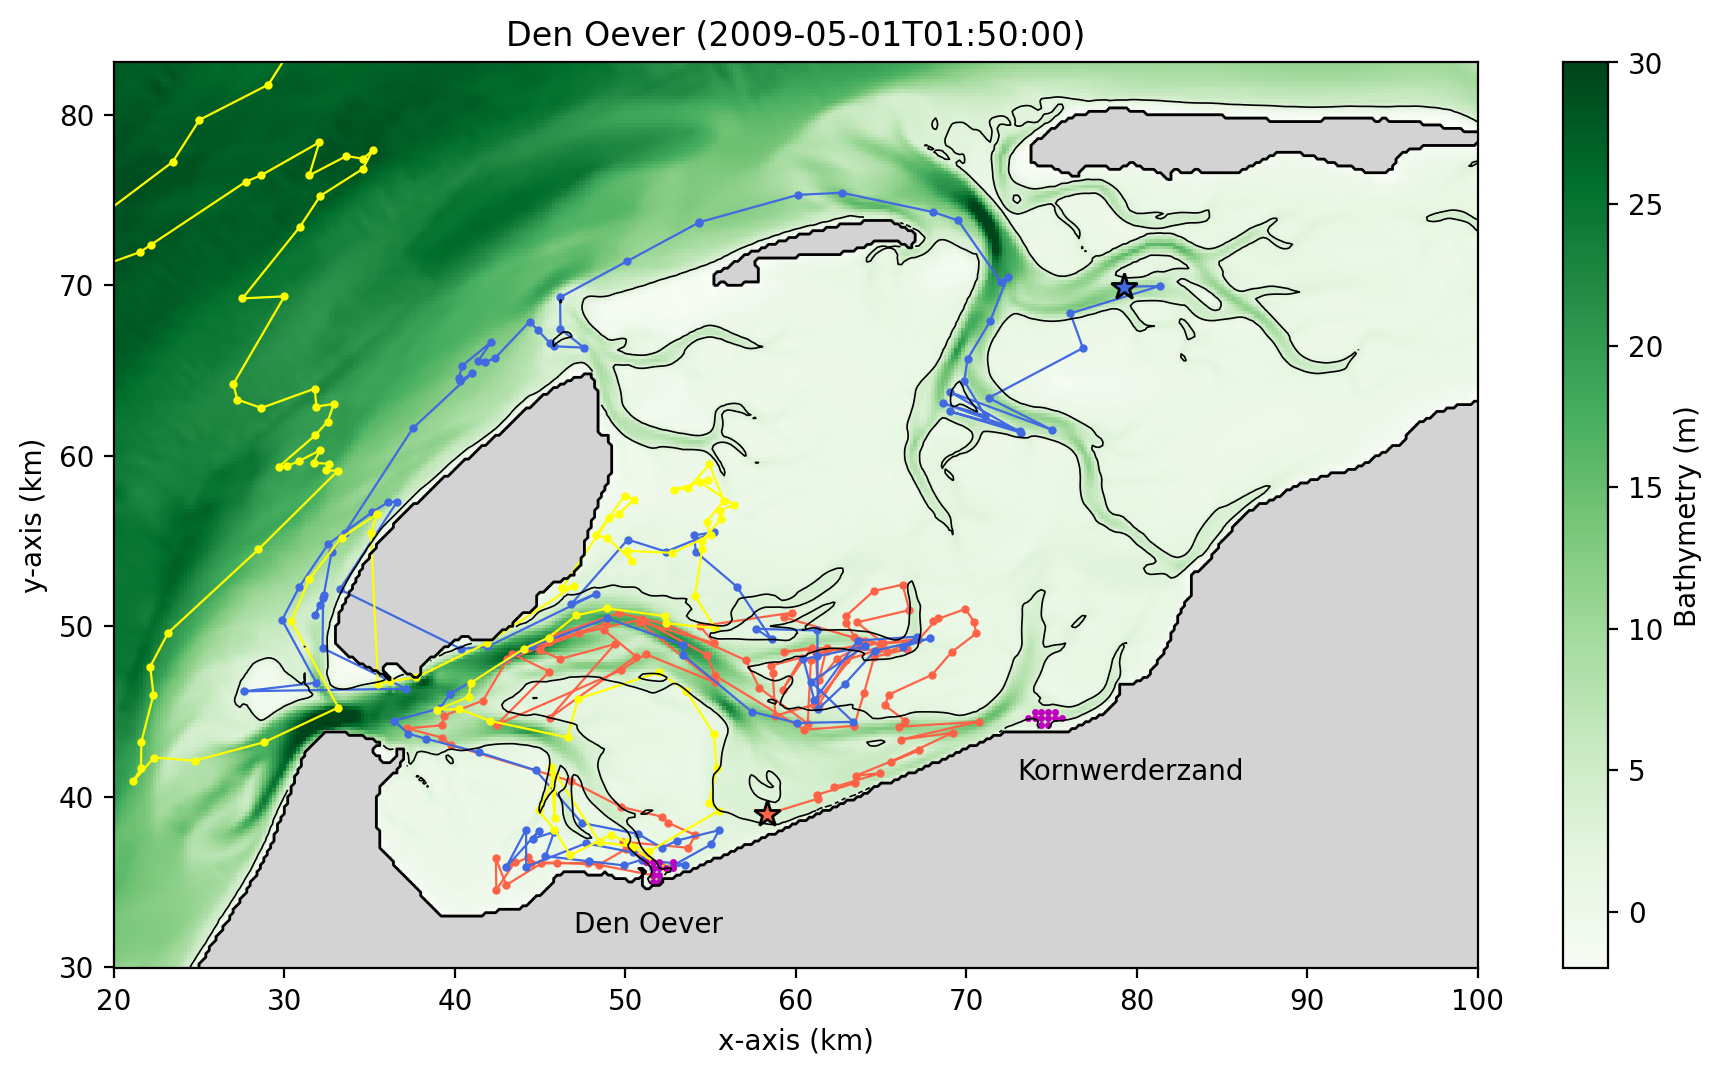

In [8]:
#get trajectories for particles deployed in a specific year-month (Den Oever)---
#select year-month
time='2009-05'
#find index
dst_den_1m=(dst_den.time.isel(obs=0)>np.datetime64(time)) & (dst_den.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_den_1m=dst_den.isel(traj=dst_den_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_den_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,6), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(47,32,'Den Oever'); 
ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([20,100,33,80]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_den.x.isel(traj=range(npa),obs=0)/1e3,dst_den.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
#
dep=0 #first deployment of this month
traj0=[2,4,6]
cols=['tomato','royalblue','yellow']
for i,j in zip(traj0,cols): 
    ax.plot(dst_den_1m.x.isel(traj=i+npa*dep)/1e3,dst_den_1m.y.isel(traj=i+npa*dep)/1e3,'.-',color=j,lw=.8,ms=4,zorder=1)
    ax.plot(dst_den_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_den_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color=j,lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_den_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'Den Oever ({time_dep})')

<ipython-input-9-ec5b19551e00>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'Kornwerderzand (2009-05-01T01:50:00)')

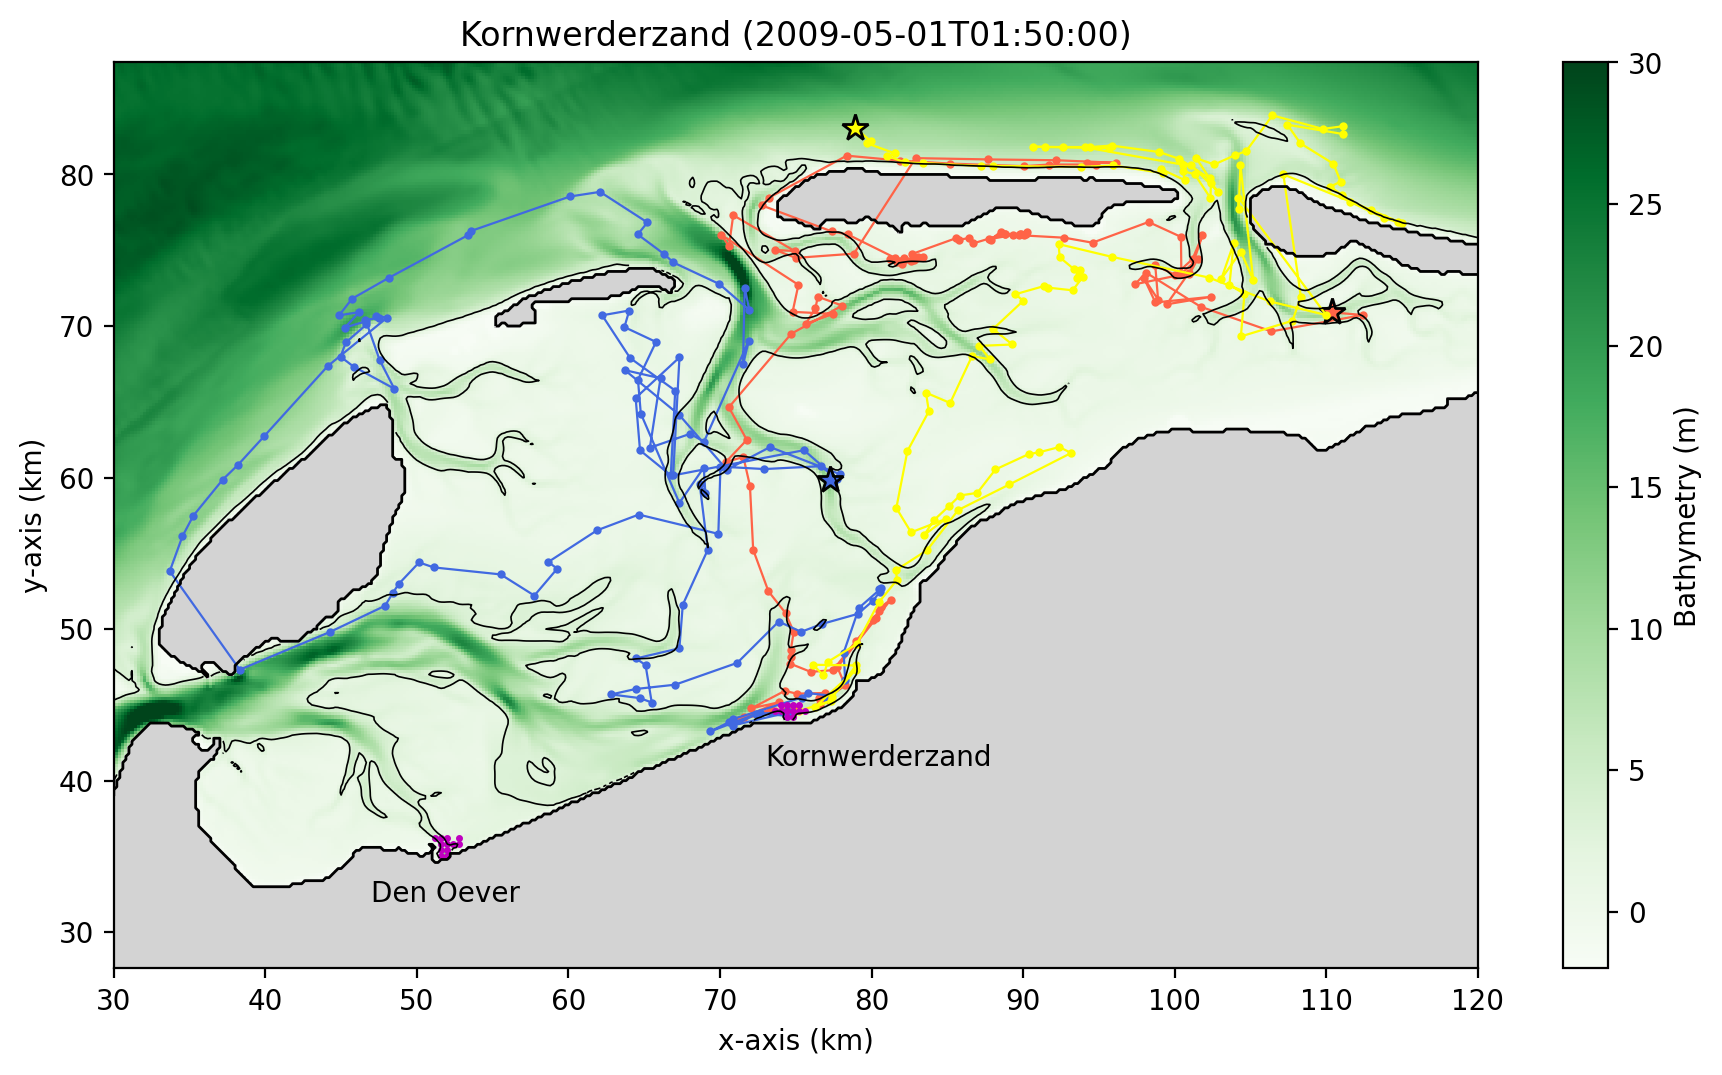

In [9]:
#get trajectories for particles deployed in a specific year-month (Korwerderzand)---
#select year-month
time='2009-05'
#find index
dst_kor_1m=(dst_kor.time.isel(obs=0)>np.datetime64(time)) & (dst_kor.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_kor_1m=dst_kor.isel(traj=dst_kor_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_kor_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,6), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(47,32,'Den Oever'); 
ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([30,120,35,80]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_den.x.isel(traj=range(npa),obs=0)/1e3,dst_den.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
#
dep=0 #1st deployment of this month
traj0=[2,4,6]
cols=['tomato','royalblue','yellow']
for i,j in zip(traj0,cols):
    ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep)/1e3,'.-',color=j,lw=.8,ms=4,zorder=1)
    ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color=j,lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_kor_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'Kornwerderzand ({time_dep})')

### Explore trajectories: 2009-11

<ipython-input-10-8cbce99eba58>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'Den Oever (2009-11-15T06:54:22)')

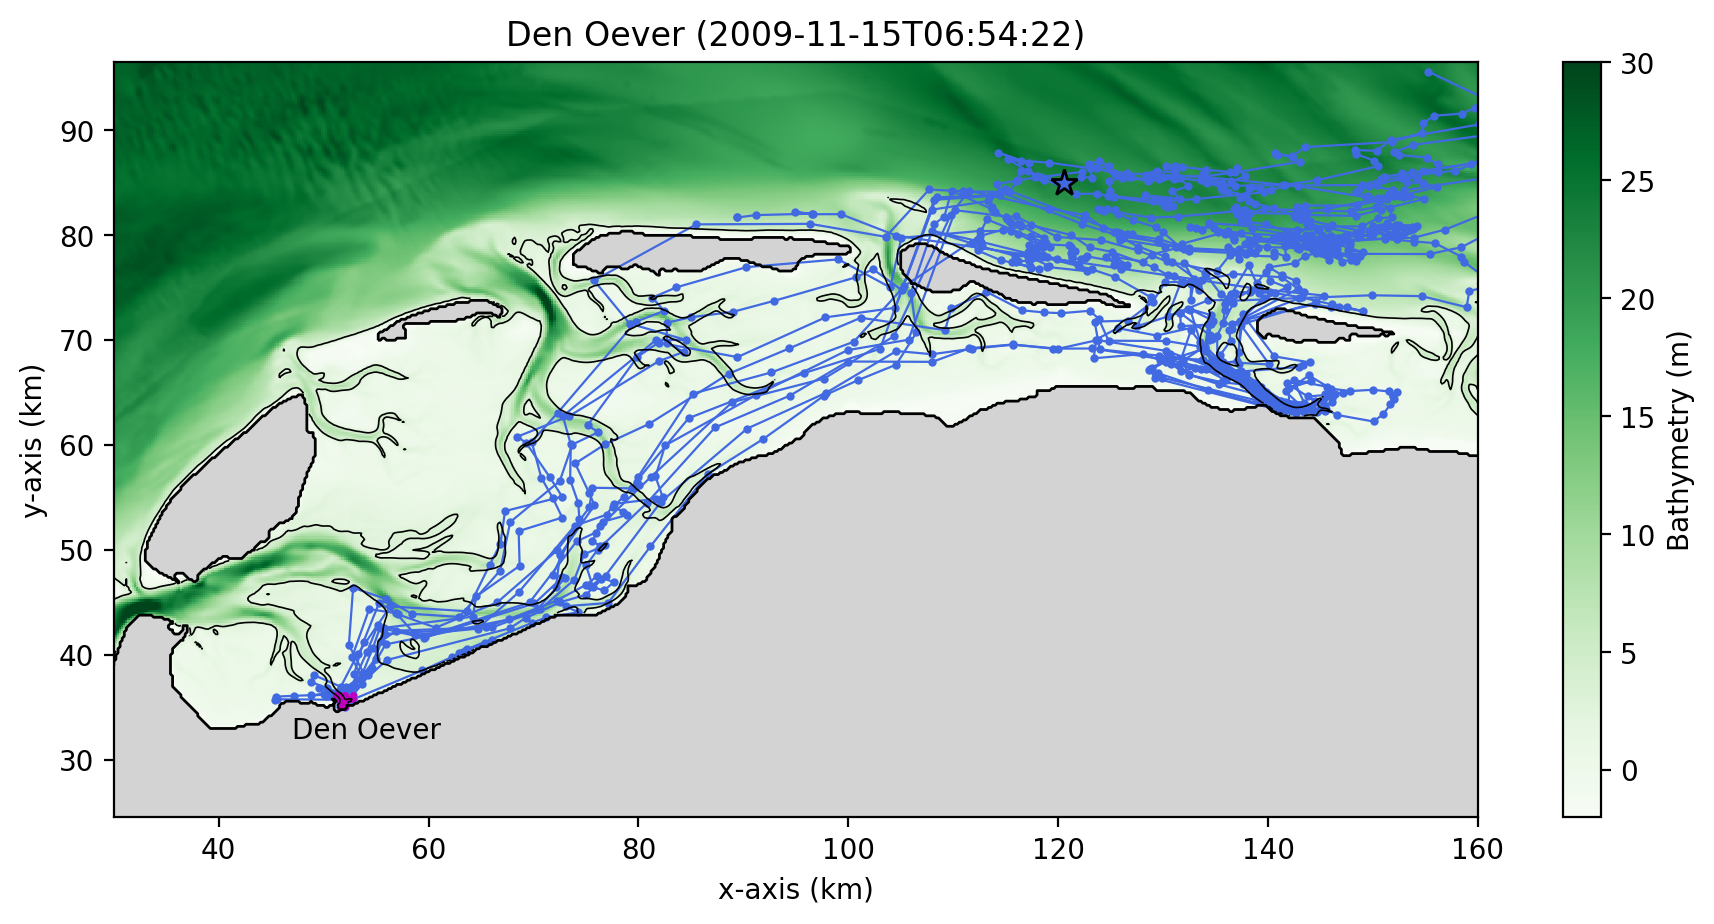

In [10]:
#get trajectories for particles deployed in a specific year-month (Den Oever)---
#select year-month
time='2009-11'
#find index
dst_den_1m=(dst_den.time.isel(obs=0)>np.datetime64(time)) & (dst_den.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_den_1m=dst_den.isel(traj=dst_den_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_den_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,5), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(47,32,'Den Oever'); 
#ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([30,160,33,88]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_den.x.isel(traj=range(npa),obs=0)/1e3,dst_den.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
#ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
#
dep=27 #first deployment of this month
traj0=range(npa)
for i in traj0: 
    ax.plot(dst_den_1m.x.isel(traj=i+npa*dep)/1e3,dst_den_1m.y.isel(traj=i+npa*dep)/1e3,'.-',color='royalblue',lw=.8,ms=4,zorder=1)
ax.plot(dst_den_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_den_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color='royalblue',lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_den_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'Den Oever ({time_dep})')

<ipython-input-11-39cfc20a186a>:24: UserWarning: No contour levels were found within the data range.
  ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);


Text(0.5, 1.0, 'kornwerderzand (2009-11-15T06:54:22)')

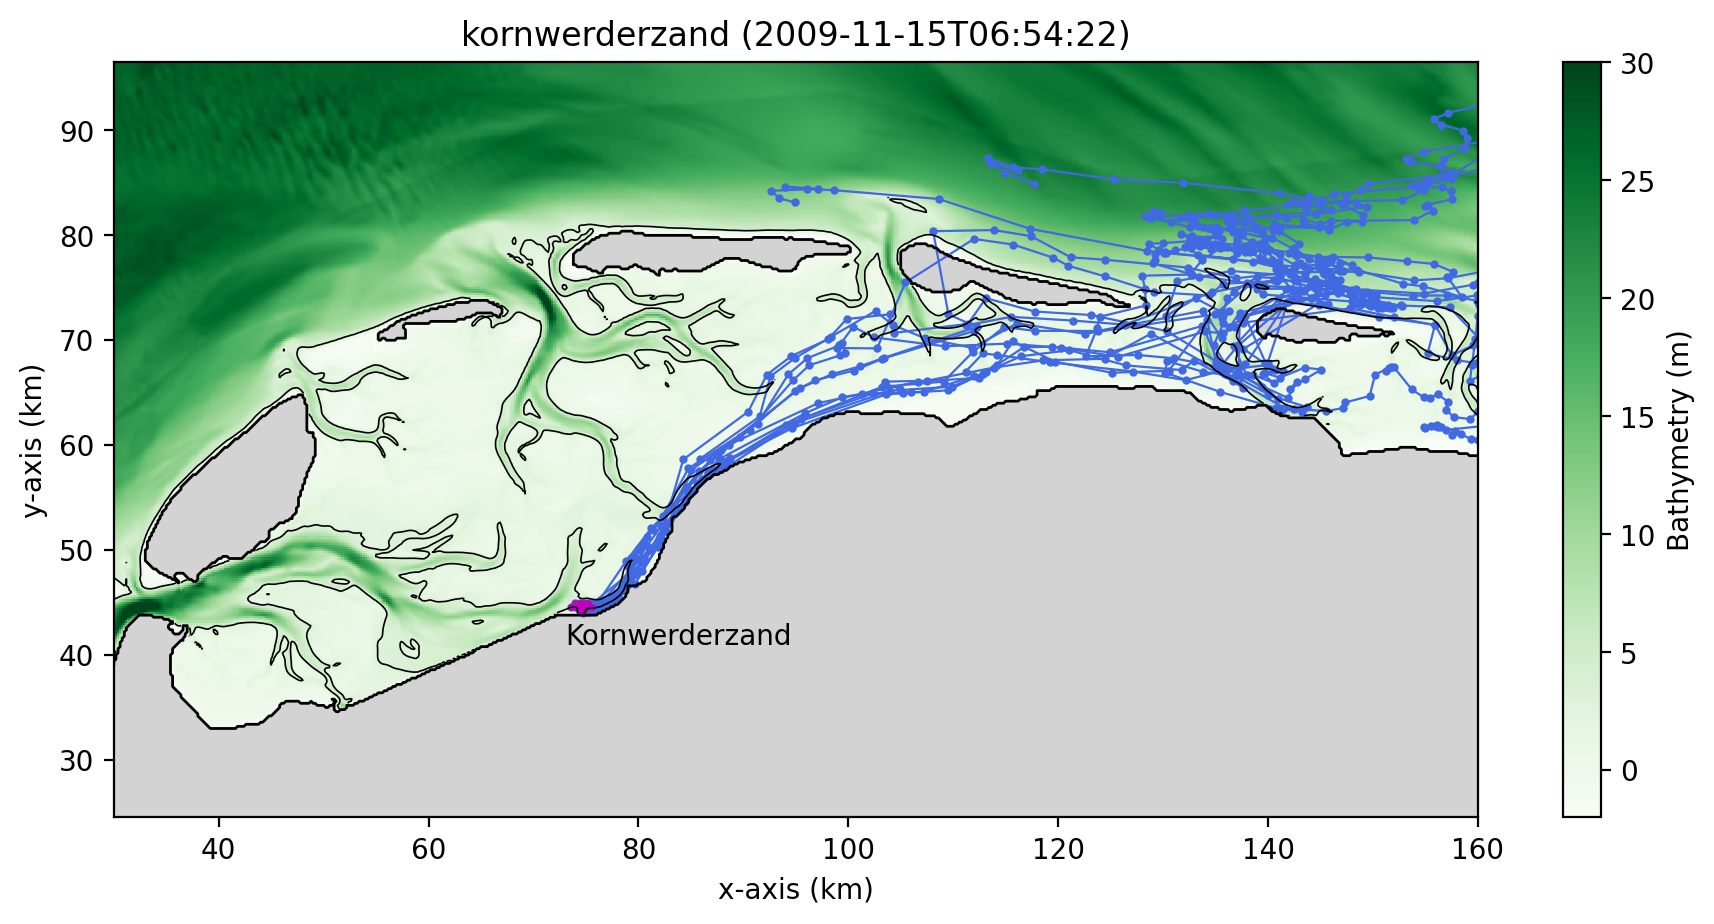

In [11]:
#get trajectories for particles deployed in a specific year-month (korwerderzand)---
#select year-month
time='2009-11'
#find index
dst_kor_1m=(dst_kor.time.isel(obs=0)>np.datetime64(time)) & (dst_kor.time.isel(obs=0)<np.datetime64(time)+np.timedelta64(1,'M'))
#get trajectories
dst_kor_1m=dst_kor.isel(traj=dst_kor_1m)
#get number of deployments for this month
num_deploys_1m=int(dict(dst_kor_1m.dims)['traj']/npa)


#plot---
fig,ax= plt.subplots(1,1,figsize=(11,5), dpi=200)
#
#background map
cmap = mpl.cm.get_cmap("Greens").copy()
cmap.set_bad(color='lightgrey')
aa=ax.pcolormesh(xc/1e3,yc/1e3,h,vmin=-2,vmax=30,shading='auto',cmap=cmap)#wind-energy lon-lat
cbar=plt.colorbar(aa,ax=ax); cbar.ax.set_ylabel('Bathymetry (m)')
ax.set_xlabel('x-axis (km)'); ax.set_ylabel('y-axis (km)')
ax.text(73,41,'Kornwerderzand')
ax.axis('equal'); ax.axis([30,160,33,88]);
ax.contour(xc/1e3,yc/1e3,h,[3],colors='k',linewidths=.6,zorder=3) #bathy in lon-lat from topo file 
ax.contour(xc/1e3,yc/1e3,mask,[1],colors='k',linewidths=1,zorder=3);
#
#plot initial positions of particles
ax.plot(dst_kor.x.isel(traj=range(npa),obs=0)/1e3,dst_kor.y.isel(traj=range(npa),obs=0)/1e3,'om',ms=1.5,zorder=2)
#
dep=27 #first deployment of this month
traj0=range(npa)
for i in traj0: 
    ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep)/1e3,'.-',color='royalblue',lw=.8,ms=4,zorder=1)
ax.plot(dst_kor_1m.x.isel(traj=i+npa*dep,obs=-1)/1e3,dst_kor_1m.y.isel(traj=i+npa*dep,obs=-1)/1e3,'*',color='royalblue',lw=.7,ms=10,markeredgecolor='k',zorder=1)
#
#initial time of the above deployment
time_dep=str(dst_kor_1m.time.isel(obs=0,traj=traj0[0]+npa*dep).values)[:-10]
ax.set_title(f'kornwerderzand ({time_dep})')